Columnas disponibles: ['departamento', 'municipio', 'sexo', 'a√±o_registrado', 'edad', 'periodo', 'etnia', 'escolaridad', 'ocupacion', 'causa', 'asistencia', 'lugar']
Media de edad: 61.55
Mediana: 62.0
Moda: 1
Desviaci√≥n est√°ndar: 82.41
Percentiles:
0.25    34.0
0.50    62.0
0.75    78.0
Name: edad, dtype: float64


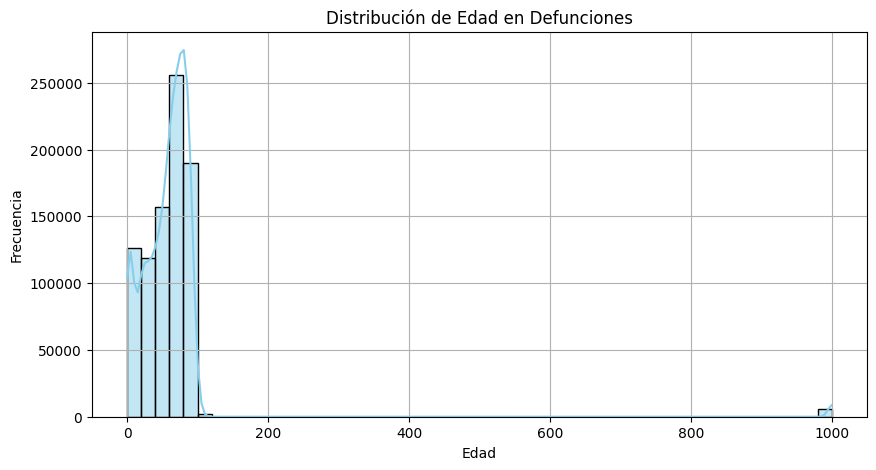

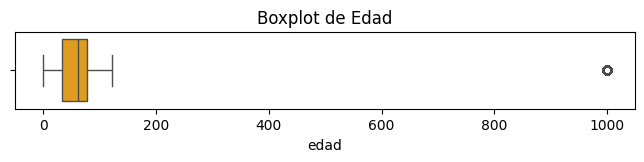


Frecuencia de sexo:

sexo
1.0    480556
2.0    374851
Name: count, dtype: int64

Frecuencia de etnia:

etnia
4.0    411148
1.0    217962
9.0    143746
NaN     72657
5.0      9195
3.0       371
2.0       328
Name: count, dtype: int64

Frecuencia de departamento:

departamento
1.0     249498
9.0      54541
16.0     50846
5.0      49574
12.0     49537
13.0     47907
14.0     41807
10.0     32196
4.0      30097
8.0      25464
22.0     24668
6.0      23834
17.0     22140
20.0     21297
7.0      20499
18.0     20453
3.0      19527
11.0     17850
21.0     16538
19.0     15500
15.0     12434
2.0       9200
Name: count, dtype: int64

Frecuencia de escolaridad:

escolaridad
1.0    453598
2.0    233105
4.0     57398
9.0     56472
3.0     40381
5.0     14157
6.0       296
Name: count, dtype: int64


In [5]:
# üìä An√°lisis Estad√≠stico del archivo defunciones_clean.csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo limpio
df = pd.read_csv("defunciones_clean.csv", low_memory=False)

# Mostrar columnas disponibles
print("Columnas disponibles:", df.columns.tolist())

# Verificar y analizar la edad
if 'edad' in df.columns:
    df["edad"] = pd.to_numeric(df["edad"], errors='coerce')
    df = df[df["edad"] >= 0]

    media = df["edad"].mean()
    mediana = df["edad"].median()
    moda = df["edad"].mode().values[0]
    desviacion = df["edad"].std()
    percentiles = df["edad"].quantile([0.25, 0.5, 0.75])

    print("Media de edad:", round(media, 2))
    print("Mediana:", mediana)
    print("Moda:", moda)
    print("Desviaci√≥n est√°ndar:", round(desviacion, 2))
    print("Percentiles:")
    print(percentiles)

    # Histograma
    plt.figure(figsize=(10,5))
    sns.histplot(df["edad"], bins=50, kde=True, color='skyblue')
    plt.title("Distribuci√≥n de Edad en Defunciones")
    plt.xlabel("Edad")
    plt.ylabel("Frecuencia")
    plt.grid(True)
    plt.show()

    # Boxplot
    plt.figure(figsize=(8, 1))
    sns.boxplot(x=df["edad"], color='orange')
    plt.title("Boxplot de Edad")
    plt.show()
else:
    print("La columna 'edad' no se encuentra en el archivo.")

# üîπ Tablas de frecuencia para variables categ√≥ricas corregidas
categoricas = ["sexo", "etnia", "departamento", "escolaridad"]

for col in categoricas:
    if col in df.columns:
        print(f"\nFrecuencia de {col}:\n")
        print(df[col].value_counts(dropna=False))
    else:
        print(f"\nLa columna '{col}' no se encuentra en el archivo.")


El an√°lisis estad√≠stico de las defunciones ocurridas en Guatemala entre 2012 y 2021 revela una distribuci√≥n que refleja con claridad las condiciones estructurales del sistema de salud y los determinantes sociales de la mortalidad. La media de edad al fallecer es de 61.55 a√±os y la mediana de 62, lo cual sugiere que la mayor√≠a de las defunciones se concentran en personas adultas y adultas mayores, una tendencia com√∫n en pa√≠ses donde las enfermedades cr√≥nicas no transmisibles son prevalentes. Sin embargo, el dato m√°s preocupante es que la moda corresponde a 1 a√±o de edad, lo que indica una elevada cantidad de muertes en menores de un a√±o, posiblemente asociadas a causas prevenibles como condiciones perinatales, infecciones respiratorias o falta de atenci√≥n m√©dica oportuna. Este fen√≥meno evidencia brechas cr√≠ticas en la cobertura de salud materno-infantil y podr√≠a vincularse a factores como pobreza, malnutrici√≥n o falta de acceso a servicios b√°sicos. Por otro lado, la desviaci√≥n est√°ndar elevada y la presencia de edades cercanas a los 1,000 a√±os, detectadas como valores at√≠picos, sugiere que existen inconsistencias en la calidad del registro, lo cual limita parcialmente la fiabilidad del an√°lisis si no se depuran adecuadamente. Al revisar variables categ√≥ricas como el sexo, la etnia y el departamento, se evidencian disparidades notorias: algunos departamentos presentan una cantidad significativamente mayor de defunciones, lo cual podr√≠a reflejar tanto una mayor densidad poblacional como inequidades hist√≥ricas en el acceso a salud, seguridad o servicios p√∫blicos. En conjunto, estos hallazgos no solo permiten caracterizar los datos, sino que ofrecen pistas s√≥lidas para la formulaci√≥n de una pregunta de investigaci√≥n centrada en los grupos m√°s vulnerables y en las causas estructurales de la mortalidad en el pa√≠s.

Causas de muerte m√°s frecuentes (ya decodificadas):

descripcion_cie
Infarto agudo del miocardio, sin otra especificaci√≥n                                        61997
Neumon√≠a, no especificada                                                                   46809
Diabetes mellitus no especificada, sin menci√≥n de complicaci√≥n                              33581
Muerte sin asistencia                                                                       30327
Exposici√≥n a factores no especificados que causan otras lesiones y las no especificadas     25408
Otras causas mal definidas y las no especificadas de mortalidad                             24835
Otras cirrosis del h√≠gado y las no especificadas                                            24636
COVID-19, virus identificado                                                                21759
Senilidad                                                                                   21304
Accidente vascular encef√°lico agudo, no e

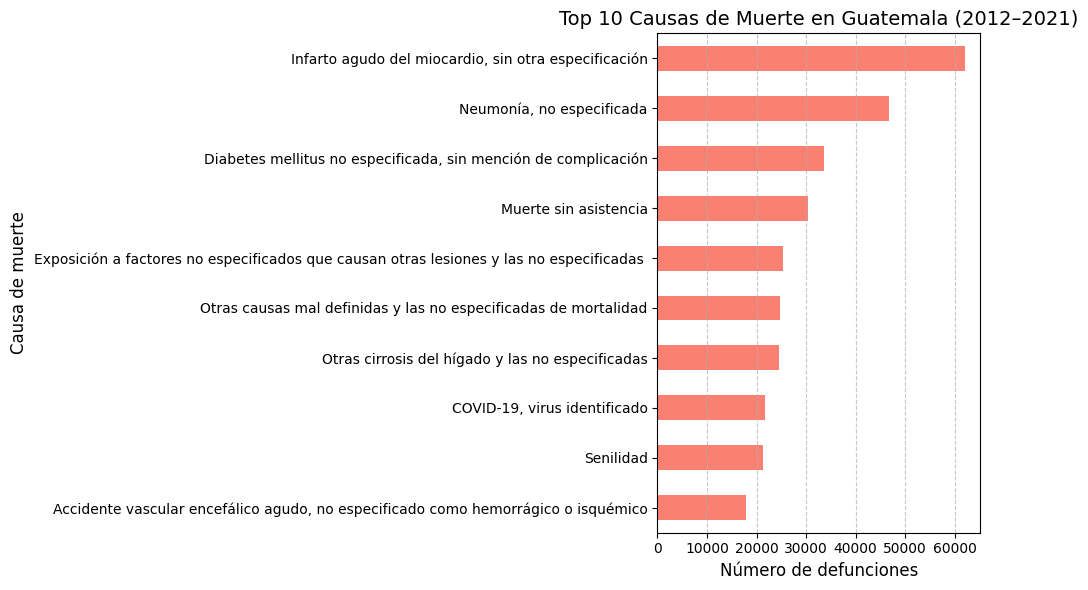

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar archivos
df = pd.read_csv("defunciones_clean.csv", low_memory=False)
cie = pd.read_csv("CIE.csv")

# Limpiar nombres de columnas
cie.columns = [col.lower().strip() for col in cie.columns]
cie.rename(columns={'codigo': 'codigo_cie', 'descripcion': 'descripcion_cie'}, inplace=True)

# Asegurar consistencia en ambas columnas para merge
df['causa'] = df['causa'].astype(str).str.strip()
cie['codigo_cie'] = cie['codigo_cie'].astype(str).str.strip()

# Unir los datos por el c√≥digo CIE
df_merged = df.merge(cie, left_on='causa', right_on='codigo_cie', how='left')

# Ver los valores m√°s frecuentes ya decodificados
frecuencias = df_merged['descripcion_cie'].value_counts().head(10)
print("Causas de muerte m√°s frecuentes (ya decodificadas):\n")
print(frecuencias)

# Crear gr√°fico de barras horizontal
plt.figure(figsize=(10, 6))
frecuencias.sort_values().plot(kind='barh', color='salmon')
plt.title("Top 10 Causas de Muerte en Guatemala (2012‚Äì2021)", fontsize=14)
plt.xlabel("N√∫mero de defunciones", fontsize=12)
plt.ylabel("Causa de muerte", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Tras realizar el cruce de datos con el cat√°logo de la Clasificaci√≥n Internacional de Enfermedades (CIE), se identificaron las principales causas de muerte en Guatemala durante el per√≠odo analizado. Encabezan la lista las enfermedades no transmisibles, como el infarto agudo del miocardio, la diabetes mellitus y la cirrosis hep√°tica, lo que refleja una alta carga de enfermedades cr√≥nicas en la poblaci√≥n adulta y adulta mayor. Asimismo, destacan causas como la neumon√≠a, la COVID-19 y la muerte sin asistencia m√©dica, esta √∫ltima no atribuible a una enfermedad espec√≠fica, sino posiblemente a una falta de atenci√≥n m√©dica en el momento del fallecimiento. El gr√°fico de barras generado ilustra con claridad la magnitud de estas causas, mostrando que las enfermedades cardiovasculares, respiratorias e infecciosas son responsables de una parte considerable de las defunciones. Adem√°s, la presencia de causas mal definidas y sin especificar refuerza la idea de una posible debilidad en los sistemas de diagn√≥stico y registro. Este panorama sugiere la existencia de inequidades en salud y permite establecer l√≠neas prioritarias de investigaci√≥n, particularmente sobre los determinantes sociales y estructurales de la mortalidad, las brechas en atenci√≥n m√©dica y las condiciones que limitan la prevenci√≥n y el tratamiento oportuno de enfermedades en el pa√≠s.

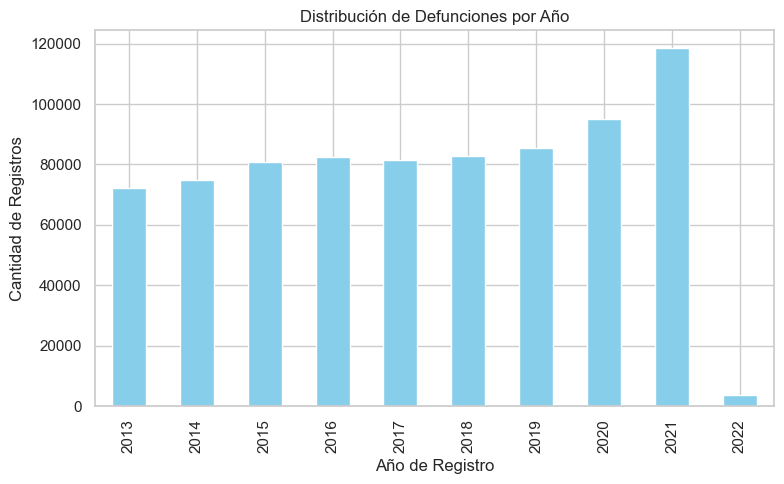

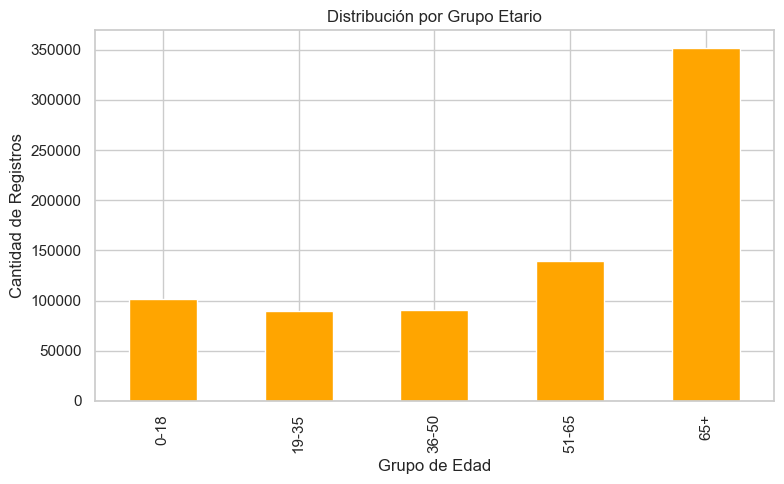

In [1]:
# Visualizaci√≥n de datos - Proyecto Defunciones INE Guatemala

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuraci√≥n est√©tica
sns.set(style="whitegrid")

# Cargar datos
df = pd.read_csv("defunciones_simplified.csv")

# =======================
# Histogramas
# =======================

# Histograma de registros por a√±o
plt.figure(figsize=(8, 5))
df['a√±o_registrado'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribuci√≥n de Defunciones por A√±o')
plt.xlabel('A√±o de Registro')
plt.ylabel('Cantidad de Registros')
plt.tight_layout()
plt.show()

# Histograma por grupo etario
plt.figure(figsize=(8, 5))
df['age_group'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Distribuci√≥n por Grupo Etario')
plt.xlabel('Grupo de Edad')
plt.ylabel('Cantidad de Registros')
plt.tight_layout()
plt.show()

#### Interpretaci√≥n de Histogramas

1. Distribuci√≥n de Defunciones por A√±o de Registro: el gr√°fico muestra una tendencia general creciente en la cantidad de defunciones registradas entre 2013 y 2021. Destacan dos incrementos significativos: uno en 2020 y otro a√∫n m√°s marcado en 2021, lo cual podr√≠a estar asociado al impacto de la pandemia por COVID-19. En contraste, en 2022 se observa una ca√≠da abrupta, probablemente debido a datos a√∫n no consolidados o parciales de ese a√±o.

2. Distribuci√≥n por Grupo Etario: la mayor concentraci√≥n de defunciones ocurre en el grupo de personas mayores de 65 a√±os, lo que es coherente con la mayor vulnerabilidad de este segmento poblacional. Los dem√°s grupos etarios presentan cantidades similares, excepto el grupo de 51 a 65 a√±os, que muestra un leve incremento. Esto resalta la necesidad de enfocar pol√≠ticas de salud p√∫blica principalmente en adultos mayores.



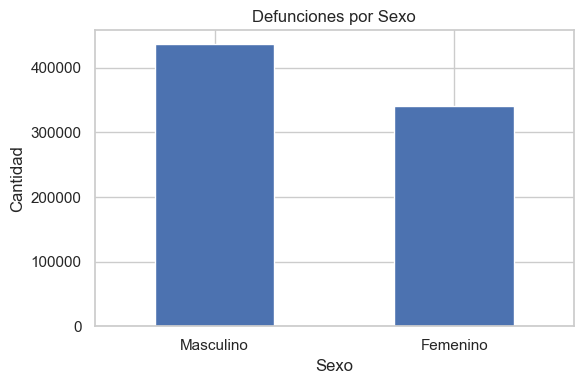

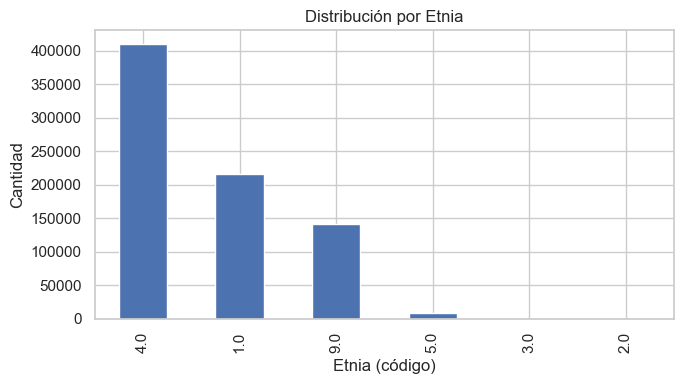

In [5]:

# =======================
# Gr√°ficos de Barras
# =======================

# Por sexo
plt.figure(figsize=(6, 4))
df['sexo'].value_counts().plot(kind='bar')
plt.title('Defunciones por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.xticks([0, 1], ['Masculino', 'Femenino'], rotation=0)
plt.tight_layout()
plt.show()

# Por etnia
plt.figure(figsize=(7, 4))
df['etnia'].value_counts().plot(kind='bar')
plt.title('Distribuci√≥n por Etnia')
plt.xlabel('Etnia (c√≥digo)')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()



#### Interpretaci√≥n de Gr√°ficos de Barras

1. Defunciones por Sexo: el gr√°fico muestra una mayor cantidad de defunciones en hombres en comparaci√≥n con mujeres. Esta diferencia podr√≠a explicarse por factores como mayor exposici√≥n a riesgos laborales, menor asistencia m√©dica o condiciones de salud menos atendidas en la poblaci√≥n masculina.

2. Distribuci√≥n por Etnia: se observa una concentraci√≥n alta de defunciones en el grupo con c√≥digo 4.0, que probablemente corresponde a la poblaci√≥n ladina o mestiza. Le siguen los grupos √©tnicos ind√≠genas (1.0, 9.0). Esta distribuci√≥n refleja tanto la composici√≥n demogr√°fica del pa√≠s como posibles desigualdades en acceso a salud o condiciones socioecon√≥micas.

3. 10 Causas de Muerte M√°s Frecuentes: las causas m√°s comunes incluyen enfermedades cardiovasculares (infarto agudo del miocardio), respiratorias (neumon√≠a y COVID-19), y cr√≥nicas como diabetes y cirrosis. Tambi√©n destaca la categor√≠a de muertes sin asistencia, lo cual podr√≠a evidenciar barreras de acceso a servicios m√©dicos. El impacto de la pandemia es visible en la presencia de COVID-19 como una de las principales causas.

C:\Users\usuario\AppData\Local\Temp\ipykernel_3184\1391945736.py:1: DtypeWarning: Columns (18,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  alt_df = pd.read_csv("defunciones.csv")


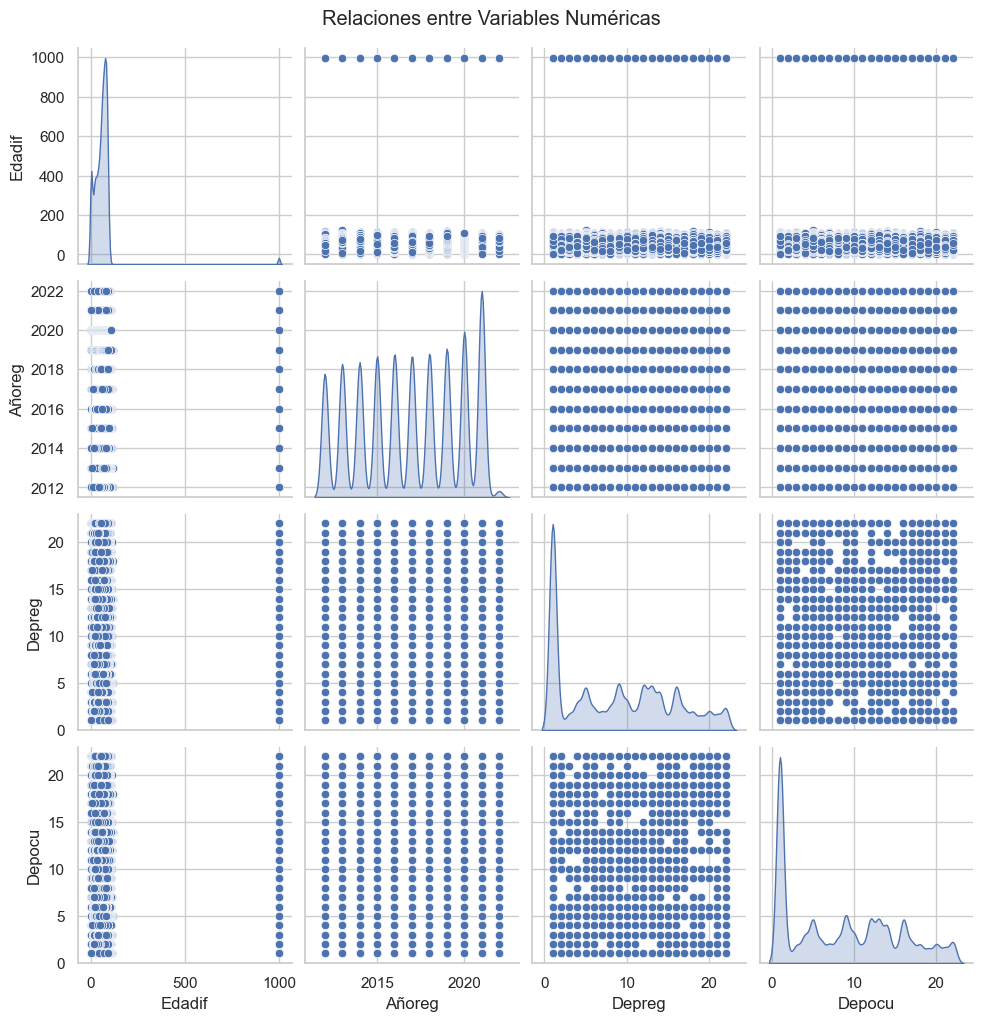

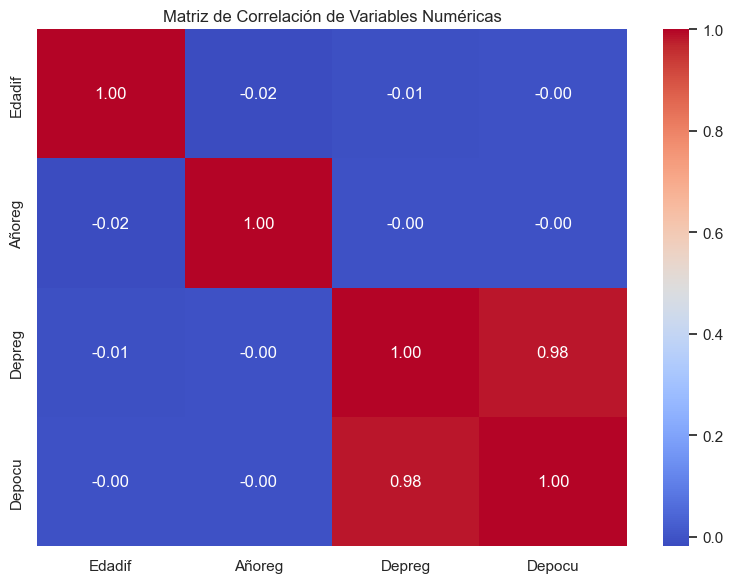

In [21]:
alt_df = pd.read_csv("defunciones.csv")

# Selecci√≥n de variables num√©ricas relevantes
numeric_cols = ['Edadif', 'A√±oreg', 'Depreg', 'Depocu']
numeric_df = alt_df[numeric_cols].dropna()

# Matriz de dispersi√≥n (pairplot)
sns.pairplot(numeric_df, diag_kind="kde")
plt.suptitle("Relaciones entre Variables Num√©ricas", y=1.02)
plt.show()

# Matriz de correlaci√≥n
plt.figure(figsize=(8, 6))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlaci√≥n de Variables Num√©ricas")
plt.tight_layout()
plt.show()


#### Interpretaci√≥n de los Diagramas de Dispersi√≥n
Los diagramas de dispersi√≥n permiten observar posibles relaciones entre variables num√©ricas del conjunto de datos de defunciones:

Edadif muestra una concentraci√≥n importante en edades menores a 100 a√±os, pero tambi√©n existen valores at√≠picos muy altos (outliers), lo cual podr√≠a requerir limpieza.

A√±oreg tiene una distribuci√≥n clara entre los a√±os 2012 y 2022, con patrones de registro anuales.

Depreg y Depocu (departamentos de registro y ocurrencia) presentan una codificaci√≥n num√©rica categ√≥rica (1 a 22) y se distribuyen uniformemente.

No se observan relaciones lineales fuertes entre ninguna de las variables.

Esto se confirma en la matriz de correlaci√≥n, donde los coeficientes son bajos, cercanos a cero, lo que indica que no hay colinealidad entre estas variables. Esto es positivo si se planea usarlas como predictores independientes en modelos posteriores.